# Evaluating Binary Classifier Thresholds

Evaluate a binary classifier various probability threshold.

The Receiving Operating Characteristic (ROC) curve is a common method for evaluating the quality of a binary classifier.

ROC compares the presence of true positives and false positives at every probability threshold. (The probability at which an observation is predected to be a class).
We can se how the model perform by plotting the ROC Curve.

The better the model the closer it is to the solid line.

 ROC Curve to caculate the TP and FP at each threshold and plotting them:

In [1]:
# Load Libraries. 

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Create feature matrix and target vector

features, target = make_classification(n_samples= 10000,
                                       n_features = 10,
                                       n_classes = 2,
                                       n_informative = 3,
                                       random_state =3)

In [3]:
# Split into training and test sets

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.1, random_state = 1)

In [4]:
# Create classifier

logit = LogisticRegression()

In [5]:
# Train Model

logit.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# Get predicted Probabilities

target_probabilities = logit.predict_proba(features_test)[:,1]

In [7]:
# Create TP and FP rates

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

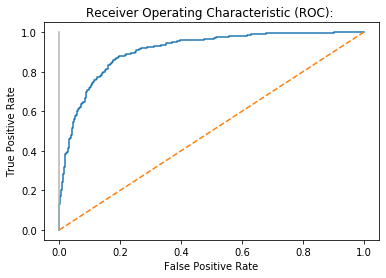

In [11]:
### Plot ROC Curve

plt.title("Receiver Operating Characteristic (ROC): ")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls = "--")
plt.plot([0,0],[1,0], c = ".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
ax.title.set_color('red')

plt.show()

PREDICT PROBA : Each observation is given an explicit probability of belonging each classes

In [8]:
# Get predicted probabilities for the first observation

logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

87% chance being in the negarive class (o) and 13% of being in the positive class.

In [9]:
# See classes

logit.classes_

array([0, 1])

### Discussion

By default scikit-learn predicts an obervation is part of the positive class if the probability is greater than 0.5 (called threshold).

True Positive Rate : TPR = (True Positives) / (True Positives + False Negatives)

Number of observations correctly predicted true divided by all positive observation


False Positive Rate : FPR = (False Positives) / (False Positive + True Negatives)

Number of incorrectly predicted positives divided by all true negatie observations.

## ROC Curve

Represents the respective TPR & FPR for every probability threshold.

In [10]:
print("Threshold: ", threshold[116])
print("True Positive Rate: ", true_positive_rate[116])
print("False Positive Rate: ", false_positive_rate[116])

Threshold:  0.5331715230155317
True Positive Rate:  0.810204081632653
False Positive Rate:  0.14901960784313725


Increase the threshold to 80%. Increase how certain a model has to be before it predicts an obsevation as positive. TPR & FPR drop significantly.

Higher requirements for being predicted to be in the positive class has made the model not identify a number of positive observations (the lower TPR) but also reduce the noise from negative observations being predicted as positive(the lower FPR)

In [12]:
print("Threshold: ", threshold[45])
print("True Positive Rate: ", true_positive_rate[45])
print("False Positive Rate: ", false_positive_rate[45])

Threshold:  0.818913387665929
True Positive Rate:  0.5448979591836735
False Positive Rate:  0.047058823529411764


### ROC AUC Curve

To visualize the trade off between TPR & FPR its commom to calculate the Area Under the Curve (AUC) to judge the overall equalirt of a model at all the possible thresholds.

The closer to 1 the better

In [14]:
# Calculate area under the curve

roc_auc_score(target_test, target_probabilities)

0.9073389355742297